In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import shutil

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False
# 매직명령어 => 쥬피터노트북에서 그래프 삽입 기능 
%matplotlib inline
# 글꼴 선명화 
%config InlineBackend.figure_format = 'retina'

# 랜덤 모듈
import random

# 학습 모델 저장 및 복원
import pickle

# 딥러닝 라이브러리
import tensorflow as tf
# 신경망 모델을 관리하는 객체
from tensorflow.keras.models import Sequential
# 선형 회귀 레이어
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 객체
from tensorflow.keras.layers import Activation

# CNN : 커널을 통해 합성곱을 구하는 것. 이미지의 특징이 두드러 지게 한다.
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D

# MaxPooling : 커널내에서 가장 큰 값을 추출하는 방식으로 불필요한 부분을 제거한다.
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPool1D

# 1차원으로 변환하는 것
from tensorflow.keras.layers import Flatten

# Dropout : 이미자나 영상, 음파 등의 데이터는 오랫동안 학습을 진행 시켜야 한다.
# 하지만 너무 빨리 과적합이 발생되면 조기 중단 때문에 학습 횟수가 줄어들 수 있다.
# 이에 은닉의 노드를 일부 사용하지 않으므로써 과적합이 빨리 오는 것을 예방하고
# 오랫동안 학습이 가능하다.
from tensorflow.keras.layers import Dropout

# Embadding : 단어의 수를 조정한다.
from tensorflow.keras.layers import Embedding

# LSTM
from tensorflow.keras.layers import LSTM

# 원핫 인코딩을 수행하는 함수
from tensorflow.keras.utils import to_categorical

# 저장된 학습모델을 복원한다.
from tensorflow.keras.models import load_model

# 모델을 자동 저장한다.
from tensorflow.keras.callbacks import ModelCheckpoint
# 성능이 더이상 좋아지지 않을 경우 중단 시킨다.
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

# 문장을 잘라준다.
from tensorflow.keras.preprocessing.text import Tokenizer
# 모든 문장 데이터의 단어 데이터의 수를 동일한 수로 맞춰준다.
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 문자열을 가지고 단어 사전을 만들어준다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# 문자열 => 숫자
from sklearn.preprocessing import LabelEncoder

# 전체데이터를 학습용과 검증으로 나눈다.
from sklearn.model_selection import train_test_split

# 랜덤시드 설정
# 데이터를 랜덤하게 섞거나 가중치를 랜덤하게 설정하는 등..
# 작업에서 랜덤을 적용하는 경우가 더러 있다.
# 이에, 시드를 고정시킨다.
random_seed = 1
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# 현재 프로젝트에서 GPU 메모리 사용을 필요한 만큼만 쓸 수 있도록 한다.
# 컴퓨터에 있는 GPU 정보들을 가져온다.

# gpus = tf.config.experimental.list_physical_devices('GPU')
# # gpu가 있다면...
# if len(gpus) > 0 :
#     try :
#         for gpu in gpus :
#             tf.config.experimental.set_memory_growth(gpu, True)
#     except RuntimeError as e :
#         print(e)

### 데이터 불러오기

In [2]:
# 이 파일은 탭으로 데이터가 구분되어 있기 때문에
# sep='\t'를 넣어 구무자를 탭으로 설정해준다.
chipo = pd.read_csv('./data/chipotle.tsv', sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [3]:
# 데이터 프레임 정보 확인
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [4]:
# 결측치 확인
chipo.isna().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [5]:
# 컬럼명 확인
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [6]:
# 인덱스
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### 요약 통계 정보

In [7]:
# 벙위형 데이터(최소와 최대가 있는...)의 요약 통계 정보
# count : 결측치를 제외한 데이터의 개수
# mean : 결측치를 제외한 평규
# std : 결측치를 제외한 표준편차
# min : 결측치를 제외한 최소값
# 25% : 결측치를 제외한 25% 위치값
# 50% : 결측치를 제외한 50% 위치값
# 75% : 결측치를 제외한 75% 위치값
# max : 결측치를 제외한 최대값
chipo[['quantity']].describe()

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [8]:
# 카테고리형 데이터에 대한 요약 통계 정보
# count : 결측치를 제외한 데이터의 개수
# unique : 결측치를 제외한 데이터의 종류 수
# top : 결측치를 포함한 가장 많이 나온 데이터
# freq : top에서 표시한 데이터의 개수
a1 = chipo[['quantity', 'item_name', 'choice_description', 'item_price']]
a2 = a1.astype('str')
a2.describe()

,quantity,item_name,choice_description,item_price
count,4622,4622,4622,4622
unique,9,50,1044,78
top,1,Chicken Bowl,nan,$8.75
freq,4355,726,1246,730


### 카테고리형 데이터의 데이터 종류

In [9]:
print(chipo['order_id'].value_counts().index)
print(chipo['item_name'].value_counts().index)
print(chipo['choice_description'].value_counts().index)
print(chipo['item_price'].value_counts().index)

Int64Index([ 926, 1483,  205,  759, 1786,  691,  491,  561, 1660,  916,
            ...
            1036, 1634,  474, 1640, 1374,  768,  341, 1048,   94, 1199],
           dtype='int64', length=1834)
Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito', 'Canned Soft Drink', 'Steak Bowl', 'Chips',
       'Bottled Water', 'Chicken Soft Tacos', 'Chips and Fresh Tomato Salsa',
       'Chicken Salad Bowl', 'Canned Soda', 'Side of Chips', 'Veggie Burrito',
       'Barbacoa Burrito', 'Veggie Bowl', 'Carnitas Bowl', 'Barbacoa Bowl',
       'Carnitas Burrito', 'Steak Soft Tacos', '6 Pack Soft Drink',
       'Chips and Tomatillo Red Chili Salsa', 'Chicken Crispy Tacos',
       'Chips and Tomatillo Green Chili Salsa', 'Carnitas Soft Tacos',
       'Steak Crispy Tacos', 'Chips and Tomatillo-Green Chili Salsa',
       'Steak Salad Bowl', 'Nantucket Nectar', 'Barbacoa Soft Tacos',
       'Chips and Roasted Chili Corn Salsa', 'Izze',
       'Chips and Tomatillo-Red 

In [10]:
# 카테고리형 데이터의 개수
print(len(chipo['order_id'].value_counts()))
print(len(chipo['item_name'].value_counts()))
print(len(chipo['choice_description'].value_counts()))
print(len(chipo['item_price'].value_counts()))

1834
50
1043
78


In [11]:
# 만약에 카테고리형 데이터의 종류를 모두 보고 싶다면
# 반복돌려서 출력해준다.
a1 = chipo['item_name'].value_counts()

a2 = a1.index
a3 = a1.values

for idx in range(len(a2)):
    print(f'{a2[idx]} : {a3[idx]}')

Chicken Bowl : 726
Chicken Burrito : 553
Chips and Guacamole : 479
Steak Burrito : 368
Canned Soft Drink : 301
Steak Bowl : 211
Chips : 211
Bottled Water : 162
Chicken Soft Tacos : 115
Chips and Fresh Tomato Salsa : 110
Chicken Salad Bowl : 110
Canned Soda : 104
Side of Chips : 101
Veggie Burrito : 95
Barbacoa Burrito : 91
Veggie Bowl : 85
Carnitas Bowl : 68
Barbacoa Bowl : 66
Carnitas Burrito : 59
Steak Soft Tacos : 55
6 Pack Soft Drink : 54
Chips and Tomatillo Red Chili Salsa : 48
Chicken Crispy Tacos : 47
Chips and Tomatillo Green Chili Salsa : 43
Carnitas Soft Tacos : 40
Steak Crispy Tacos : 35
Chips and Tomatillo-Green Chili Salsa : 31
Steak Salad Bowl : 29
Nantucket Nectar : 27
Barbacoa Soft Tacos : 25
Chips and Roasted Chili Corn Salsa : 22
Izze : 20
Chips and Tomatillo-Red Chili Salsa : 20
Veggie Salad Bowl : 18
Chips and Roasted Chili-Corn Salsa : 18
Barbacoa Crispy Tacos : 11
Barbacoa Salad Bowl : 10
Chicken Salad : 9
Veggie Soft Tacos : 7
Carnitas Crispy Tacos : 7
Veggie Sal

### 가장 많이 주문한 item 파악하기

In [12]:
# 상품 이름별 몇 개씩 저장되어 있는지 값을 가져온다.
a1 = chipo['item_name'].value_counts()
# value_counts 함수는 개수를 기준으로 내림차순 정렬되기 때문에
# 가장 처음 것의 index를 추출하면 된다.
a2 = a1.index
print(f'가장 많이 주문한 음식 : {a2[0]}')

가장 많이 주문한 음식 : Chicken Bowl


### item_name 당 주문 개수와 총량을 구한다.

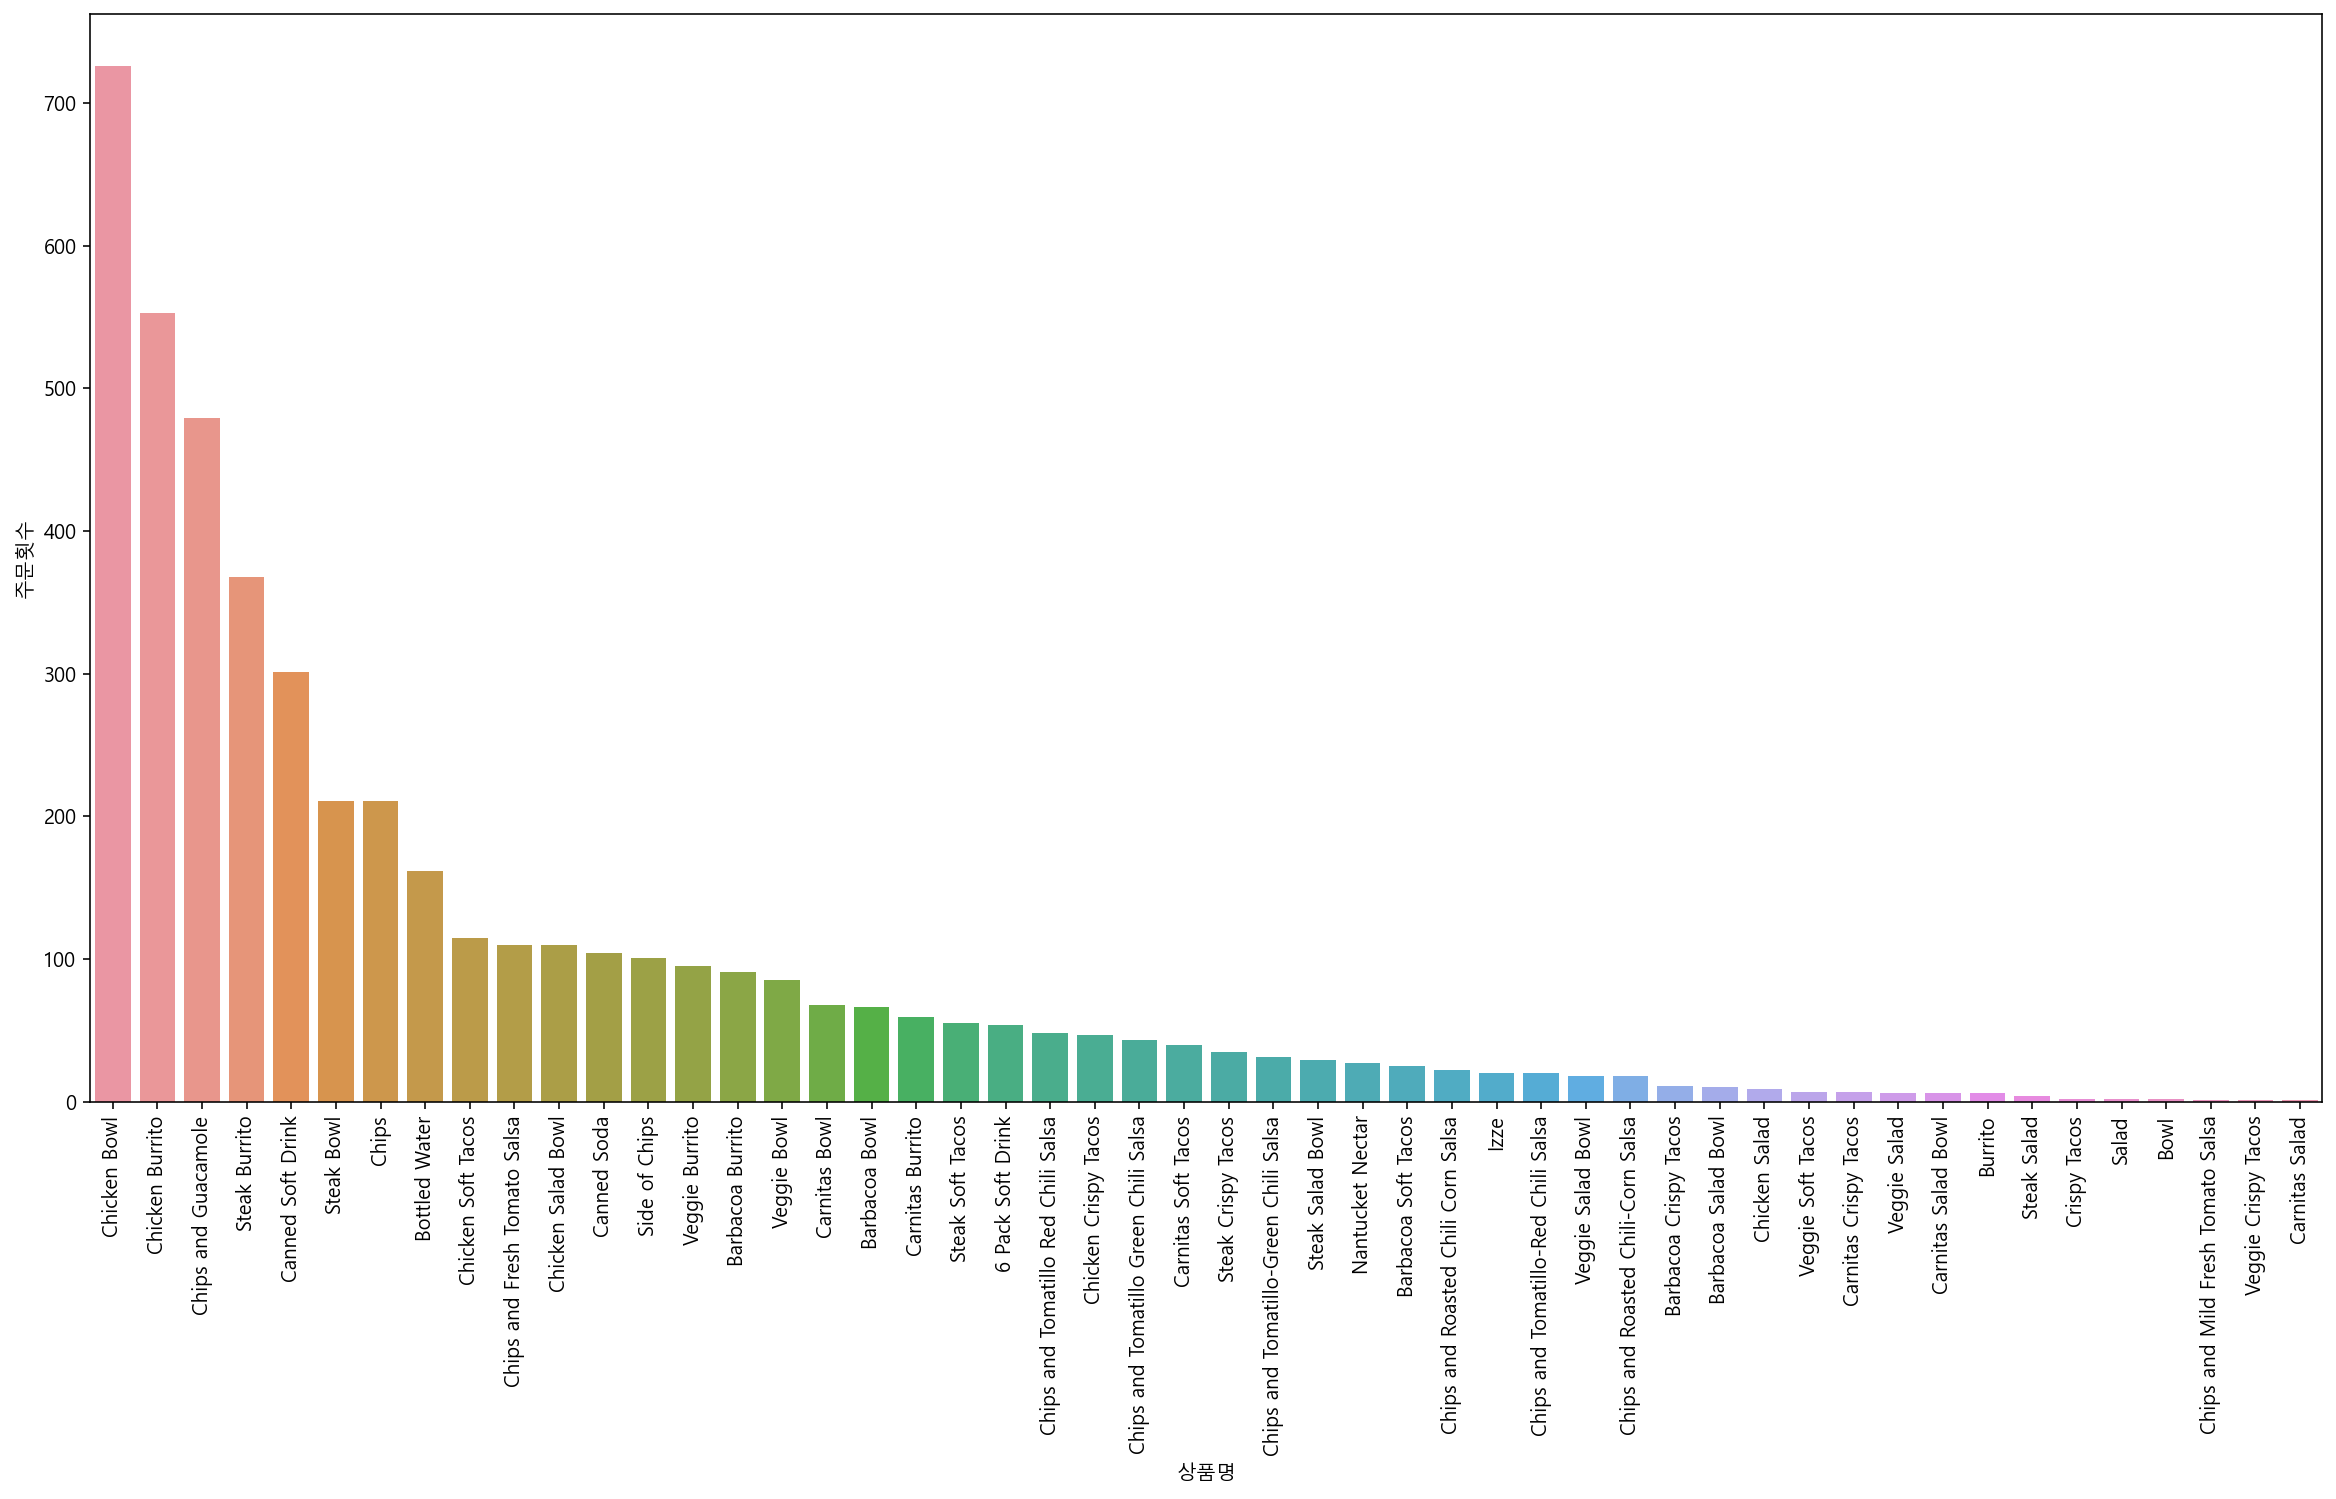

In [13]:
# item_name당 주문 개수(횟수)를 구한다.
a1 = chipo['item_name'].value_counts()
a2 = pd.DataFrame(a1)
a2.reset_index(inplace=True)
a2.columns = ['상품명', '주문횟수']
plt.figure(figsize=(20,10))
sns.barplot(data=a2, x='상품명', y='주문횟수')
plt.xticks(rotation=90)
plt.show()

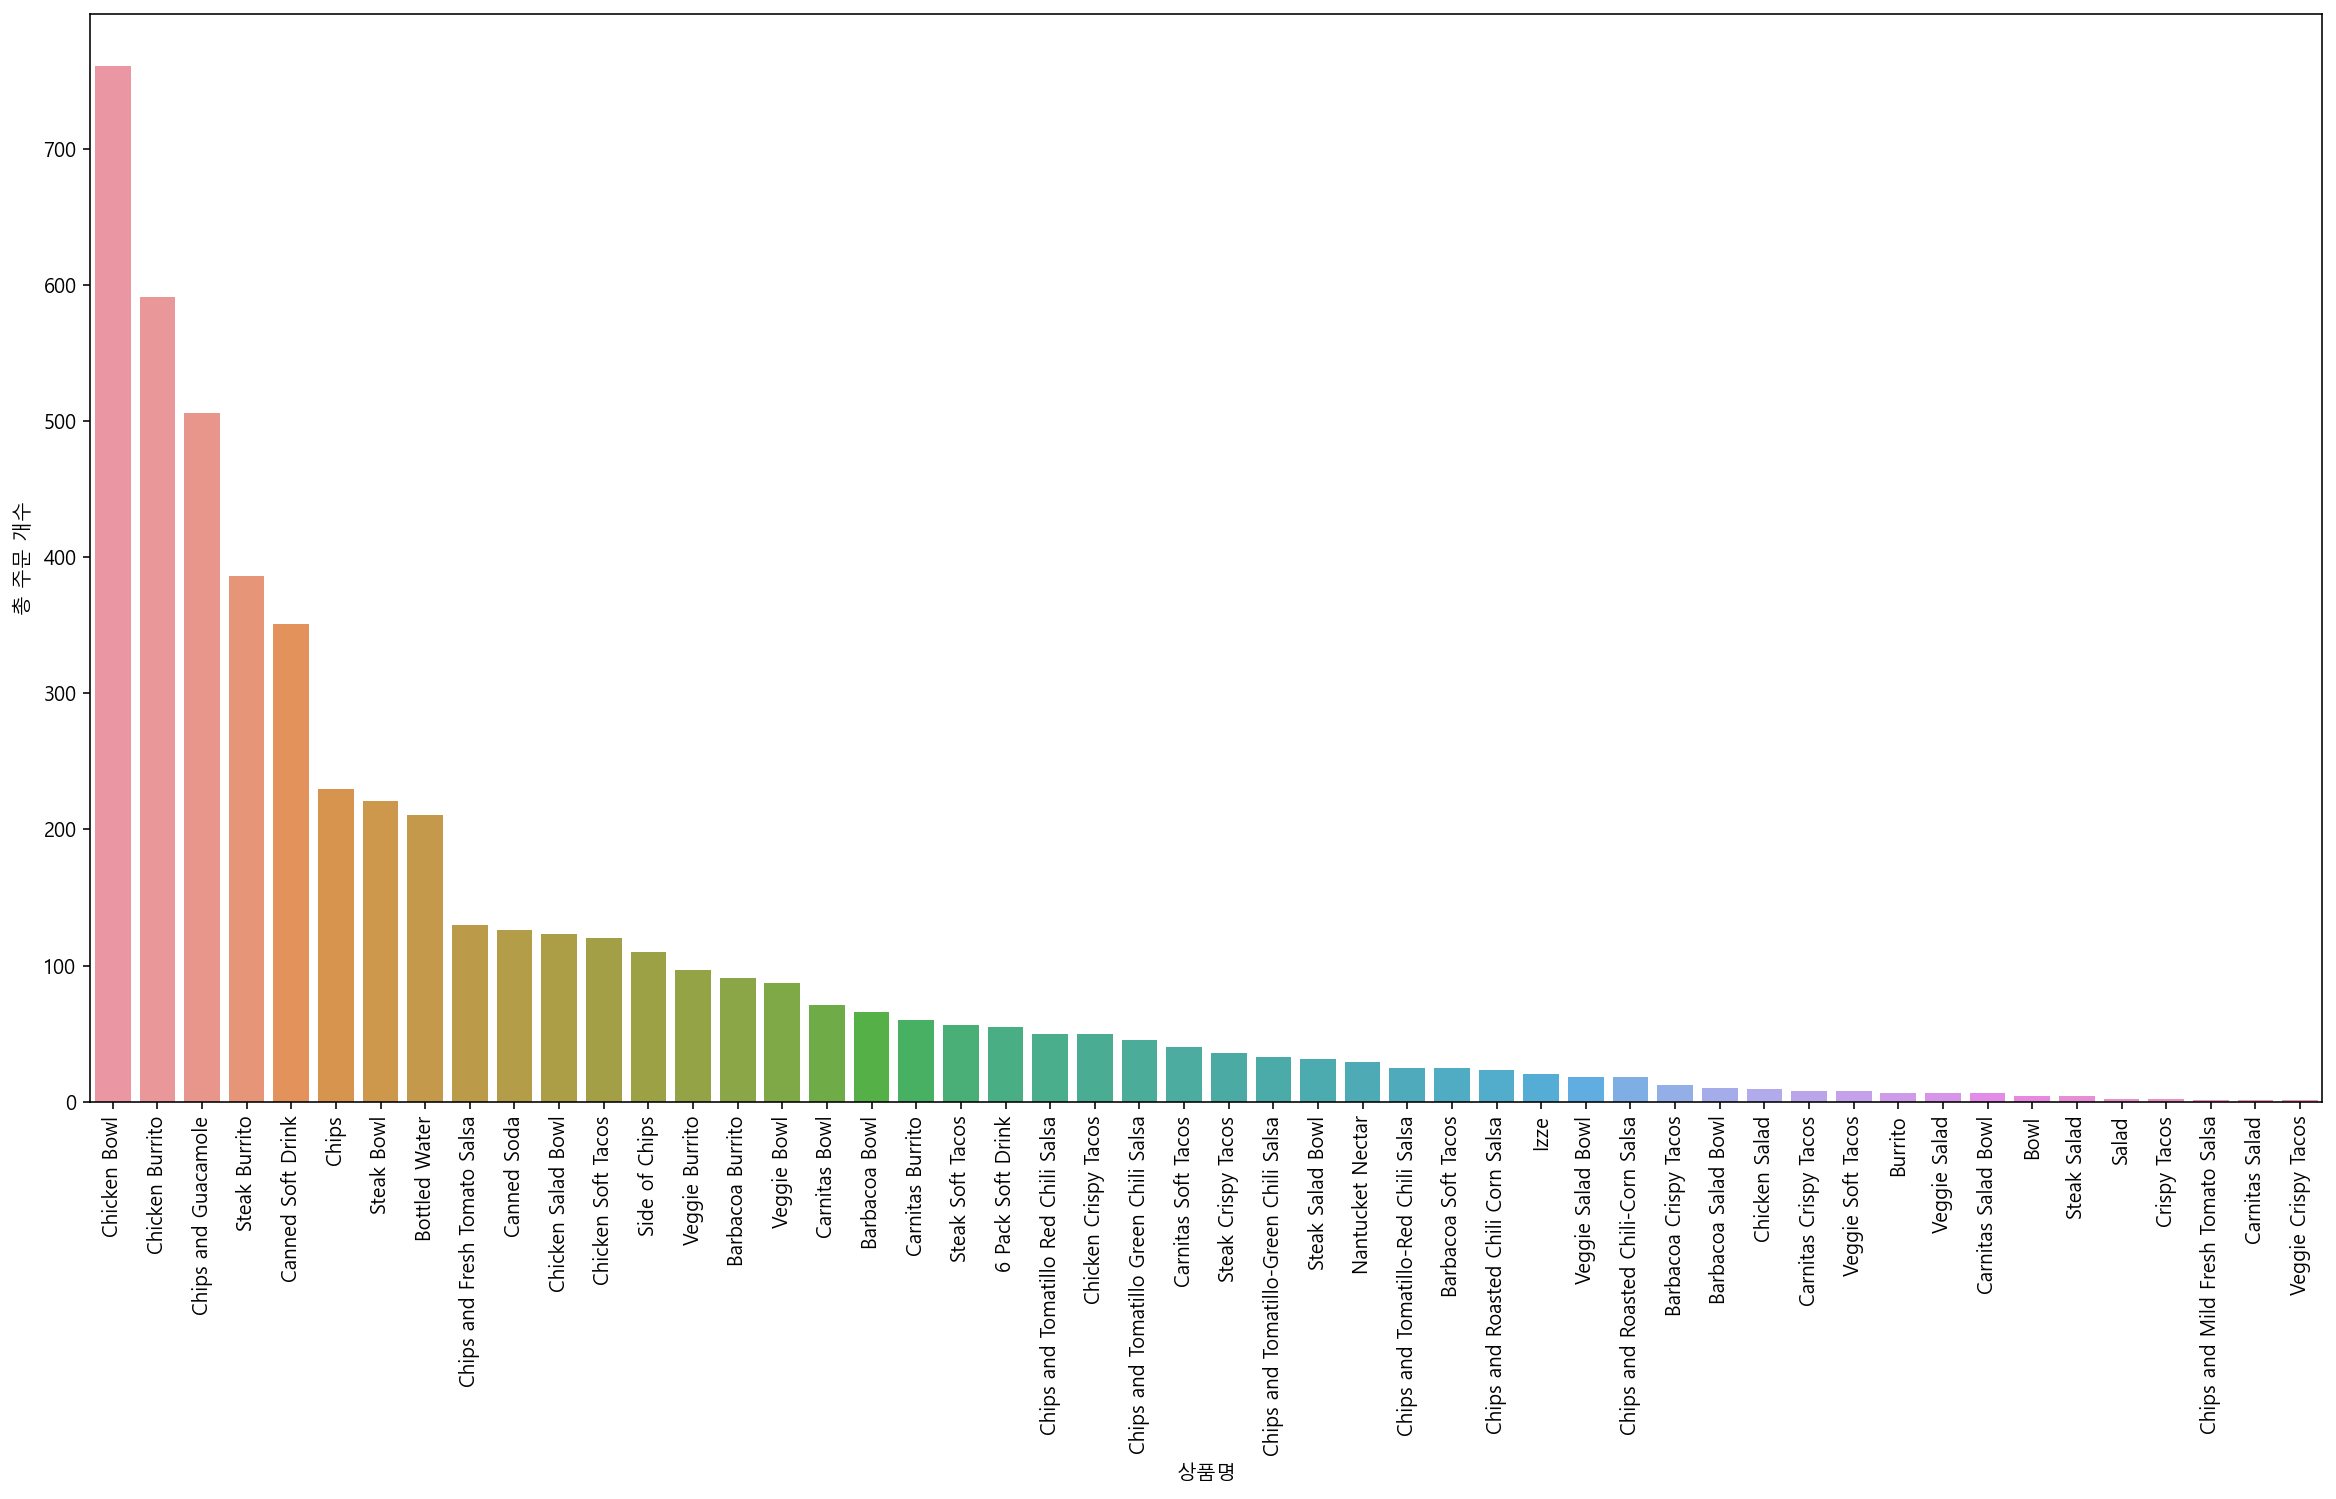

In [14]:
# 각 상품별 주문 총 개수를 구한다.
a1 = chipo[['item_name', 'quantity']].groupby('item_name').sum()
a1.reset_index(inplace=True)
a1.sort_values(by='quantity', inplace=True, ascending=False)
a1.columns = ['상품명', '총 주문 개수']
plt.figure(figsize=(20,10))
sns.barplot(data=a1, x='상품명', y='총 주문 개수')
plt.xticks(rotation=90)
plt.show()

### apply와 lambda 함수를 이용한 데이터 전처리

In [15]:
# item_price에서 앞에 $를 제외한 나머지를 가져온다.
a1 = chipo['item_price'].str[1:]
# 실수값으로 변환한다.
a2 = a1.astype('float64')
a2

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [16]:
a1 = chipo['item_price'].apply(lambda x : float(x[1:]))
a1

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [17]:
# 전처리
chipo['item_price'] = a1
chipo['item_price']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

### 문제
- 주문당 평균 계산 금액을 출력
- 한 주문에서 10달러 이상 주문한 주문의 id를 출력한다.
- 각 아이템의 평균 가격을 구한다.
- 가장 비싼 주문에서 item이 몇개 팔렸는지..
- Veggie Saled Bowl이 몇 번 주문 되었는지..
- Chiken Bowl을 2개 이상 주문한 주문 횟수 구하기

### 주문당 평균 계산 금액을 출력

In [31]:
# 데이터 프레임 확인
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [34]:
# 추가 주문 내역이 없는 것을 가져온다.
a1 = chipo.query('choice_description.isna()', engine='python')

# quantity가 한 개인 것을 가져온다.
a2 = a1.query('item_name == "Chips" and quantity == 1')
# quantity가 두 개인 것을 가져온다.
a3 = a1.query('item_name == "Chips" and quantity == 2')

display(a2)
display(a3)

,order_id,quantity,item_name,choice_description,item_price
40,19,1,Chips,NaN,2.15
59,27,1,Chips,NaN,2.15
77,34,1,Chips,NaN,2.15
80,35,1,Chips,NaN,2.15
208,92,1,Chips,NaN,2.15
...,...,...,...,...,...
4505,1791,1,Chips,NaN,2.15
4509,1793,1,Chips,NaN,1.99
4525,1799,1,Chips,NaN,2.15
4584,1823,1,Chips,NaN,2.15


,order_id,quantity,item_name,choice_description,item_price
223,98,2,Chips,NaN,4.3
828,343,2,Chips,NaN,4.3
1301,530,2,Chips,NaN,4.3
1600,648,2,Chips,NaN,4.3
1605,649,2,Chips,NaN,4.3
1850,750,2,Chips,NaN,4.3
1900,766,2,Chips,NaN,4.3
2112,850,2,Chips,NaN,4.3
2258,909,2,Chips,NaN,4.3
2343,934,2,Chips,NaN,4.3


- item_price는 상품에 대한 단가가 아니라 해당 주문에 대한 총 금액임을 알 수 있다.
- item_price는 단가에 quantity를 곱한 값이 된다.
- 만약에 item_price가 단가였다면 quantity를 곱한 총 금액을 가진 값을 구해야 한다.
- 허나 본 데이터의 item_price는 상품별 단가가 아니라 주문한 총 금액이 되므로 그냥 각 주문 번호를 기준으로 그룹을 묶고 평균을 구하면 된다.

In [35]:
# 각 주문당 총 구매 액을 구한다.
a1 = chipo.groupby('order_id')['item_price'].sum()
a1

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

In [38]:
# 주문당 평균 금액을 구한다.
chipo[['order_id', 'item_price']].groupby('order_id').mean()

,item_price
order_id,
1,2.890000
2,16.980000
3,6.335000
4,10.500000
5,6.850000
...,...
1830,11.500000
1831,4.300000
1832,6.600000


In [39]:
# 주문당 금액 총합
chipo[['order_id', 'item_price']].groupby('order_id').sum()

,item_price
order_id,
1,11.56
2,16.98
3,12.67
4,21.00
5,13.70
...,...
1830,23.00
1831,12.90
1832,13.20


In [40]:
# 하나의 주문에서 주문한 건수를 구한다.
chipo[['order_id', 'item_price']].groupby('order_id').count()

,item_price
order_id,
1,4
2,1
3,2
4,2
5,2
...,...
1830,2
1831,3
1832,2


### 한 주문에서 20달러 이상 주문한 주문의 id를 출력한다.

In [19]:
a1 = chipo.query('item_price >= 10')
a1['order_id'].unique()

array([   2,    3,    4,    7,   12,   19,   20,   21,   24,   26,   27,
         28,   30,   35,   40,   41,   43,   54,   57,   59,   60,   61,
         62,   63,   64,   65,   66,   67,   68,   70,   71,   72,   73,
         74,   75,   79,   80,   83,   84,   86,   89,   90,   93,   94,
         95,   96,   99,  103,  105,  107,  109,  114,  123,  124,  126,
        127,  128,  129,  132,  134,  137,  140,  144,  146,  147,  148,
        149,  152,  153,  157,  158,  159,  163,  165,  166,  168,  170,
        171,  174,  175,  176,  177,  178,  179,  180,  181,  185,  186,
        189,  192,  193,  195,  196,  198,  202,  203,  204,  205,  206,
        207,  210,  211,  212,  222,  223,  227,  228,  229,  231,  235,
        237,  238,  239,  241,  242,  243,  245,  248,  250,  253,  256,
        258,  261,  262,  264,  269,  271,  273,  277,  278,  282,  283,
        284,  290,  293,  295,  297,  300,  304,  305,  306,  308,  309,
        316,  317,  324,  327,  328,  329,  337,  3

---

In [41]:
# 각 주문별 총 주문 금액을 구한다.
a1 = chipo[['order_id', 'item_price']].groupby('order_id').sum()
a1

,item_price
order_id,
1,11.56
2,16.98
3,12.67
4,21.00
5,13.70
...,...
1830,23.00
1831,12.90
1832,13.20


In [47]:
a2 = a1.query('item_price >= 10')
for a3 in a2.index:
    print(a3, end='\t')

1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	26	27	28	29	30	31	32	33	34	35	36	37	38	39	40	41	42	43	44	45	46	47	48	49	50	51	52	53	54	55	56	57	58	59	60	61	62	63	64	65	66	67	68	69	70	71	72	73	74	75	76	77	78	79	80	81	82	83	84	85	86	87	88	89	90	91	92	93	94	95	96	97	98	99	100	101	102	103	104	105	106	107	108	109	110	111	112	113	114	115	116	117	118	119	120	121	122	123	124	125	126	127	128	129	130	131	132	133	134	135	136	137	138	139	140	141	142	143	144	145	146	147	148	149	150	151	152	153	154	155	156	157	158	159	160	161	162	163	164	165	166	167	168	169	170	171	172	173	174	175	176	177	178	179	180	181	182	183	184	185	186	187	188	189	190	191	192	193	194	195	196	197	198	199	200	201	202	203	204	205	206	207	208	209	210	211	212	213	214	215	216	217	218	219	220	221	222	223	224	225	226	227	228	229	230	231	232	233	234	235	236	237	238	239	240	241	242	243	244	245	246	247	248	249	250	251	252	253	254	255	256	257	258	259	260	261	262	263	264	265	266	267	268	269	270	271	272	273	274	275	276	277	

### 각 아이템의 평균 가격을 구한다.

In [66]:
a1 = chipo[['item_name', 'item_price']].groupby('item_name').sum()
a1

,item_price
item_name,
6 Pack Soft Drink,356.95
Barbacoa Bowl,672.36
Barbacoa Burrito,894.75
Barbacoa Crispy Tacos,120.21
Barbacoa Salad Bowl,106.40
Barbacoa Soft Tacos,250.46
Bottled Water,302.56
Bowl,29.60
Burrito,44.40


In [67]:
a2 = chipo[['item_name', 'quantity']].groupby('item_name').sum()
a2

,quantity
item_name,
6 Pack Soft Drink,55
Barbacoa Bowl,66
Barbacoa Burrito,91
Barbacoa Crispy Tacos,12
Barbacoa Salad Bowl,10
Barbacoa Soft Tacos,25
Bottled Water,211
Bowl,4
Burrito,6


In [68]:
a1.reset_index(inplace=True)
a2.reset_index(inplace=True)

In [69]:
a1 = a1.merge(a2)

In [70]:
a1['item_price_avg'] = a1['item_price'] / a1['quantity']

In [77]:
a1 = a1.drop(['item_price','quantity'], axis=1)
a1.sort_values(by='item_price_avg', ascending=False, inplace=True)
a1

,item_name,item_price_avg
42,Steak Salad Bowl,11.083548
15,Carnitas Salad Bowl,11.056667
4,Barbacoa Salad Bowl,10.640000
11,Carnitas Bowl,10.376197
38,Steak Bowl,10.227104
1,Barbacoa Bowl,10.187273
48,Veggie Salad Bowl,10.138889
5,Barbacoa Soft Tacos,10.018400
3,Barbacoa Crispy Tacos,10.017500
21,Chicken Salad Bowl,9.989837


In [49]:
# 상품의 개수를 가져온다
len(chipo['item_name'].value_counts())

50

In [51]:
# 한개만 팔린 상품들의 종류 개수를 가져온다.
a1 = chipo.query('quantity==1')
a2 = a1['item_name'].value_counts()
len(a2)

50

- 하나만 팔린 목록에 모든 상품이 존재한다.

In [52]:
# 1개만 팔린 상품들의 목록을 가져온다.
chipo_one_item = chipo.query('quantity == 1')
chipo_one_item

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [60]:
# 특정 상품의 가격이 한 가지만 있는지 확인한다.
a1 = chipo_one_item.query('item_name == "Chips and Fresh Tomato Salsa"')
a1['item_price'].value_counts()

2.95    66
2.39    36
2.29     3
Name: item_price, dtype: int64

- 같은 상품이라고 하더라도 주문에 따라 단가가 달라질 수 있다.
- 그래서 상품에 대한 단가의 평균을 구한다.

In [61]:
# 모든 주문 건수에 대한 상품 하나의 가격을 구한다.
chipo['item_price2'] = chipo['item_price'] / chipo['quantity']
chipo['item_price2']

0        2.39
1        3.39
2        3.39
3        2.39
4        8.49
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price2, Length: 4622, dtype: float64

In [62]:
# 각 상품별 평균을 구한다.
a1 = chipo[['item_name', 'item_price2']].groupby('item_name').mean()
a1.reset_index(inplace=True)
a1.columns = ['상품이름', '상품단가']
a1.sort_values(by='상품단가', ascending=False, inplace=True)
a1

,상품이름,상품단가
15,Carnitas Salad Bowl,11.056667
42,Steak Salad Bowl,11.027931
4,Barbacoa Salad Bowl,10.640000
11,Carnitas Bowl,10.315588
38,Steak Bowl,10.232559
1,Barbacoa Bowl,10.187273
48,Veggie Salad Bowl,10.138889
3,Barbacoa Crispy Tacos,10.087273
5,Barbacoa Soft Tacos,10.018400
44,Veggie Bowl,10.011882


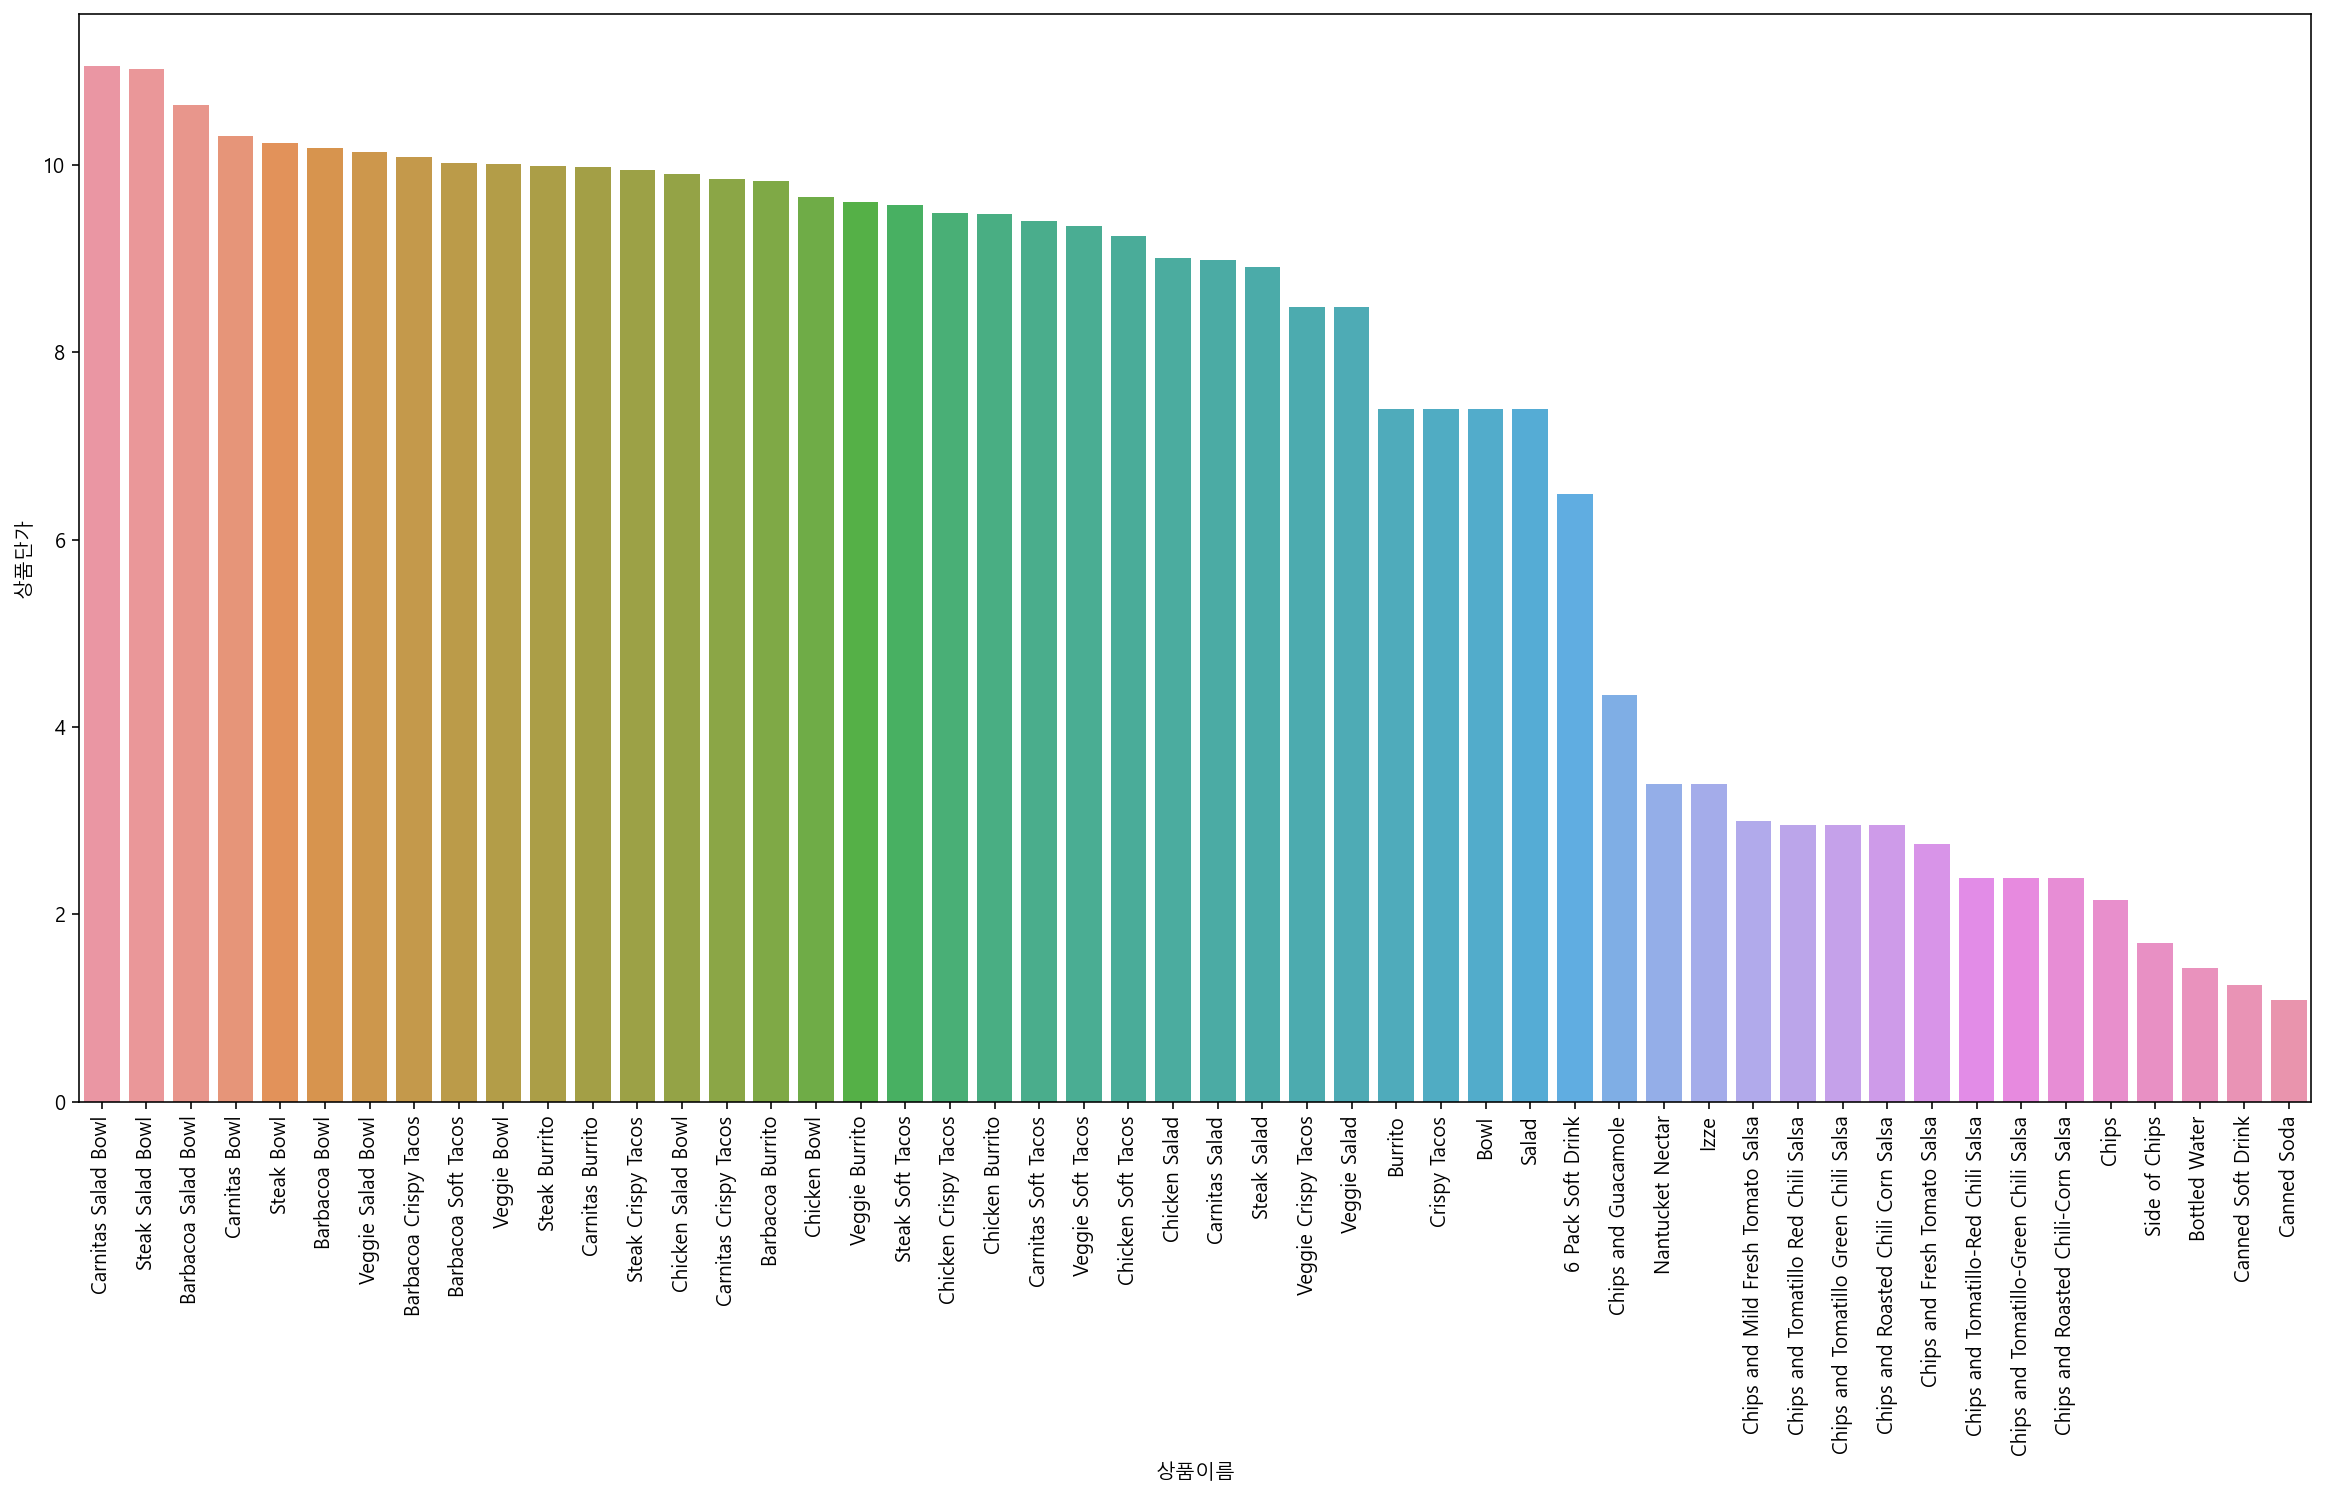

In [64]:
plt.figure(figsize=(20,10))
sns.barplot(data=a1, x='상품이름', y='상품단가')
plt.xticks(rotation=90)
plt.show()

### 가장 비싼 주문에서 item이 몇개 팔렸는지..

In [26]:
a1 = chipo.sort_values(by='item_price', ascending=False)
a1

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25
3480,1398,3,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",35.25
1254,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",35.00
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75
...,...,...,...,...,...
3936,1578,1,Canned Soda,[Diet Dr. Pepper],1.09
2922,1162,1,Bottled Water,NaN,1.09
1396,567,1,Canned Soda,[Coca Cola],1.09
2562,1014,1,Canned Soda,[Coca Cola],1.09


In [27]:
a2 = a1['quantity'].values[0]

In [28]:
print(f'가장 비싼 주문에서 item이 {a2}개 팔렸습니다.')

가장 비싼 주문에서 item이 15개 팔렸습니다.


---

In [79]:
# order_id, quantity, item_price를 가져온다.
a1 = chipo[['order_id', 'quantity', 'item_price']]
a1

,order_id,quantity,item_price
0,1,1,2.39
1,1,1,3.39
2,1,1,3.39
3,1,1,2.39
4,2,2,16.98
...,...,...,...
4617,1833,1,11.75
4618,1833,1,11.75
4619,1834,1,11.25
4620,1834,1,8.75


In [80]:
# order_id 를 기준으로 총합을 구한다.
a2 = a1.groupby('order_id').sum()
a2

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


In [81]:
# item_price를 기준으로 정렬한다.
a2.sort_values(by='item_price', ascending=False, inplace=True)
a2

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30
...,...,...
17,2,10.08
889,2,10.08
1014,2,10.08


In [85]:
a2.reset_index(inplace=True)
a2

,order_id,quantity,item_price
0,926,23,205.25
1,1443,35,160.74
2,1483,14,139.00
3,691,11,118.25
4,1786,20,114.30
...,...,...,...
1829,17,2,10.08
1830,889,2,10.08
1831,1014,2,10.08
1832,1303,2,10.08


In [86]:
print(f'주문번호 : {a2.loc[0, "order_id"]}')
print(f'주문개수 : {a2.loc[0, "quantity"]}')
print(f'주문금액 : {a2.loc[0, "item_price"]}')

주문번호 : 926
주문개수 : 23
주문금액 : 205.25


### Veggie Salad Bowl이 몇 번 주문 되었는지..

In [29]:
chipo.query('item_name == "Veggie Salad Bowl"').count()

order_id              18
quantity              18
item_name             18
choice_description    18
item_price            18
dtype: int64

---

In [87]:
# Veggie Salad Bowl의 주문 내역을 가져온다.
chipo_salad = chipo.query('item_name == "Veggie Salad Bowl"')
chipo_salad

,order_id,quantity,item_name,choice_description,item_price,item_price2
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25,11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25,11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75
1316,536,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75,8.75
1884,760,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
2156,869,1,Veggie Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25,11.25
2223,896,1,Veggie Salad Bowl,"[Roasted Chili Corn Salsa, Fajita Vegetables]",8.75,8.75
2269,913,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75,8.75


In [88]:
# 주문 횟수를 가져온다.
print(f'총 주문 횟수 : {len(chipo_salad)}')

총 주문 횟수 : 18


In [89]:
print(f'총 주문 횟수 : {chipo_salad.shape[0]}')

총 주문 횟수 : 18


### Chicken Bowl을 2개 이상 주문한 주문 횟수 구하기

In [30]:
a1 = chipo.query('item_name == "Chicken Bowl"')
a1[a1['quantity']>=2].count()

order_id              33
quantity              33
item_name             33
choice_description    33
item_price            33
dtype: int64

---

In [91]:
# Chicken Bowl을 2개 이상 주문한 주문 목록을 가져온다.
a1 = chipo.query('item_name == "Chicken Bowl" and quantity >= 2')
a1

,order_id,quantity,item_name,choice_description,item_price,item_price2
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49
154,70,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50,8.75
282,124,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",17.50,8.75
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94,10.98
415,181,2,Chicken Bowl,[Tomatillo Red Chili Salsa],17.50,8.75
654,271,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50,8.75
976,401,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50,8.75
1017,418,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Cheese, Black Beans]]",17.50,8.75
1106,457,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50,8.75
1429,578,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Sour Cream, Guacam...",22.50,11.25


In [92]:
print(f'주문 횟수 : {len(a1)}')

주문 횟수 : 33
